In [7]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

import numpy as np
from prospect.models.templates import TemplateLibrary
from prospect.models import SpecModel
import prospect.models.transforms as transforms
import prospect.plotting.utils as utils
import matplotlib.pyplot as plt
import tools

In [2]:
model_params = TemplateLibrary["beta"]
model = SpecModel(model_params)
print(model)

:::::::
<class 'prospect.models.sedmodel.SpecModel'>

Free Parameters: (name: prior) 
-----------
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)
  duste_umin: <class 'prospect.models.priors.TopHat'>(mini=0.1,maxi=25)
  duste_qpah: <class 'prospect.models.priors.TopHat'>(mini=0.5,maxi=7.0)
  duste_gamma: <class 'prospect.models.priors.LogUniform'>(mini=0.001,maxi=0.15)
  fagn: <class 'prospect.models.priors.LogUniform'>(mini=1e-05,maxi=3.0)
  agn_tau: <class 'prospect.models.priors.LogUniform'>(mini=5.0,maxi=150.0)
  dust_ratio: <class 'prospect.models.priors.ClippedNormal'>(mean=1.0,sigma=0.3,mini=0.0,maxi=2.0)
  dust_index: <class 'prospect.models.priors.TopHat'>(mini=-2.0,maxi=0.5)
  nzsfh: <class 'prospect.models.priors_beta.NzSFH'>(zred_mini=0.001,zred_maxi=15.0,mass_mini=7.0,mass_maxi=12.5,z_mini=-1.98,z_maxi=0.19,logsfr_ratio_mini=-5.0,logsfr_ratio_maxi=5.0,logsfr_ratio_tscale=0.3,nbins_sfh=7,const_phi=True)

Fixed Parameters: (name: value [, depends_on]) 
--

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

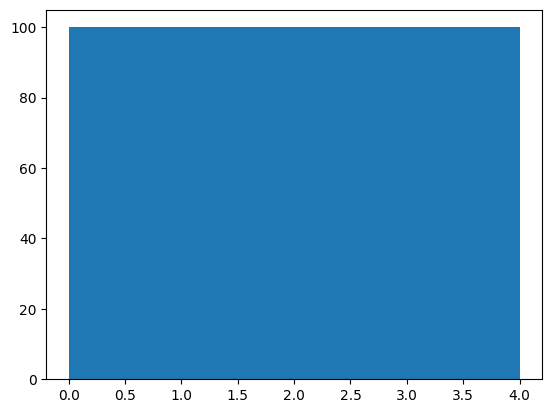

In [3]:
samples = utils.sample_prior(model, 1000)[0]
plt.hist(samples[:,0])

In [4]:
meow = samples[:, -1]
meow.shape
#transforms.nzsfh_to_zred(meow)

(1000,)

In [9]:
SpecModel._wave = np.linspace(100, 1000, 1000) 
SpecModel._zred = 0.5 
model.predict_phot(filters = tools.load_lsst_filters("./"))

AttributeError: 'SpecModel' object has no attribute '_norm_spec'